![](image2.png)

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , accuracy_score , roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn import (metrics, linear_model, preprocessing)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Cleaned_data.csv')
df.head()

,id,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,...,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,grad_school,university,high_school,male,married
0,1,20000,24,0,2,-1,-1,-2,-2,3913,...,0,0,0,0,1,0,1,0,0,1
1,2,120000,26,0,2,0,0,0,2,2682,...,1000,1000,0,2000,1,0,1,0,0,0
2,3,90000,34,0,0,0,0,0,0,29239,...,1000,1000,1000,5000,0,0,1,0,0,0
3,4,50000,37,0,0,0,0,0,0,46990,...,1200,1100,1069,1000,0,0,1,0,0,1
4,5,50000,57,0,0,-1,0,0,0,8617,...,10000,9000,689,679,0,0,1,0,1,1


In [3]:
print('Cleaned Credit Card Default Data - rows:' , df.shape[0],'columns:', df.shape[1])

Cleaned Credit Card Default Data - rows: 30000 columns: 27


# Modelling 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score , confusion_matrix , precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [5]:
robust_scaler = RobustScaler()

In [6]:
target = 'default'
X = df.drop('default' , 1)
X = robust_scaler.fit_transform(X)
y = df[target]

In [7]:
# features = [x for x in df.columns if x not in ['default']]
features = X
target = y

# <a id="7">Train Test Split</a>

In [8]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.20 , random_state = 123 , stratify = y)

In [22]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=.2,random_state=42)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24000, 26)
(6000, 26)
(24000,)
(6000,)


# Base Function

In [12]:
def base_func(element):
    #train and fit the model
    model = element()
    model.fit(X_train , y_train)
    
    #predict
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    #evaluation
    train_accuracy = roc_auc_score(y_train , train_preds)
    test_accuracy = roc_auc_score(y_test , test_preds)
    
    print(str(element))
    print("--------------------------------------------")
    print(f"Training Accuracy: {(train_accuracy * 100) :.4}%")
    print(f"Test Accuracy : {(test_accuracy * 100) :.4}%")
    
    #Store accuracy in a new DataFrame
    score_logreg = [element , train_accuracy , test_accuracy]
    print("------------------------------------------------")
    models = pd.DataFrame([score_logreg])    

# Run All Models Function

In [20]:
def run_model2(model, X_train, y_train,X_test, y_test ):
    model.fit(X_train, y_train)

    # predict
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # evaluate
    train_accuracy = roc_auc_score(y_train, train_preds)
    test_accuracy = roc_auc_score(y_test, test_preds)
    report = classification_report(y_test, test_preds)

    #print confusion matrix
    cnf_matrix = confusion_matrix(y_test , test_preds)
    print("Confusion Matrix:\n" , cnf_matrix)

  #print reports of the model accuracy
    print('Model Scores')
    print("------------------------")
    print(f"Training Accuracy: {(train_accuracy * 100):.4}%")
    print(f"Test Accuracy:     {(test_accuracy * 100):.4}%")
    print("------------------------------------------------------")
    print('Classification Report : \n', report)
    print("-----------------------------------------------------")
    print("Confusion Matrix:\n" , cnf_matrix)

# Run 4 models

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
algorithms = [RandomForestClassifier , LogisticRegression , DecisionTreeClassifier , GaussianNB]

for element in algorithms:
    base_func(element)

<class 'sklearn.ensemble.forest.RandomForestClassifier'>
--------------------------------------------
Training Accuracy: 95.38%
Test Accuracy : 59.04%
------------------------------------------------
<class 'sklearn.linear_model.logistic.LogisticRegression'>
--------------------------------------------
Training Accuracy: 56.86%
Test Accuracy : 56.52%
------------------------------------------------
<class 'sklearn.tree.tree.DecisionTreeClassifier'>
--------------------------------------------
Training Accuracy: 100.0%
Test Accuracy : 58.16%
------------------------------------------------
<class 'sklearn.naive_bayes.GaussianNB'>
--------------------------------------------
Training Accuracy: 66.89%
Test Accuracy : 66.17%
------------------------------------------------


# Create Confusion Matrix

In [15]:
def C_Matrix(CM , labels = ['pay','default']):
    df = pd.DataFrame(data = CM , index = labels, columns = labels)
    df.index.name = 'True'
    df.columns.name = "Precision"
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis = 1)
    return df

# Create Dataframe for Metrics

In [116]:
metrics = pd.DataFrame(index = ['accuracy','precision','recall'],
                      columns = ['Baseline','NullModel','LogisticReg','DecisionTree','NaiveBayes'])

In [ ]:
# Defining Important Concept

In [ ]:
TPR - Sensitivity / power
FPR - Recall or (1 - specificity) / Alpha

In [ ]:
# Ends Here

# Baseline Models

In [17]:
rf_model = RandomForestClassifier(n_jobs = -1 , random_state = 15)
rf_model.fit(X_train , y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=15, verbose=0, warm_start=False)

In [21]:
run_model2(rf_model , X_train , y_train , X_test , y_test)

Confusion Matrix:
 [[4423  250]
 [1011  316]]
Model Scores
------------------------
Training Accuracy: 95.48%
Test Accuracy:     59.23%
------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.95      0.88      4673
           1       0.56      0.24      0.33      1327

   micro avg       0.79      0.79      0.79      6000
   macro avg       0.69      0.59      0.60      6000
weighted avg       0.76      0.79      0.76      6000

-----------------------------------------------------
Confusion Matrix:
 [[4423  250]
 [1011  316]]


In [ ]:
Observations for Random Forest Confusion Matrix:
TP : 4423
TN : 316
FP : 250
FN : 1011    

In [108]:
# create a dataframe for the metrics of the Random Forest model
y_pred_test = rf_model.predict(X_test)
metrics.loc['accuracy','RandomForest'] = accuracy_score(y_pred = y_pred_test ,y_true = y_test)
metrics.loc['precision','Baseline'] = precision_score(y_pred = y_pred_test , y_true = y_test)
metrics.loc['recall','Baseline'] = recall_score(y_pred = y_pred_test , y_true = y_test)

CM = confusion_matrix(y_pred = y_pred_test , y_true = y_test)
C_Matrix(CM)

Precision,pay,default,Total
True,,,
pay,4423,250,4673
default,1011,316,1327
Total,5434,566,6000


# <a id="7">The Null Model</a>
- Always predicts the most common category

In [23]:
y_pred_test = np.repeat(y_train.value_counts().idxmax() , y_test.size)

metrics.loc['accuracy','NullModel'] = accuracy_score(y_pred = y_pred_test , y_true = y_test)
metrics.loc['precision','NullModel'] = precision_score(y_pred = y_pred_test , y_true = y_test)
metrics.loc['recall','NullModel'] = recall_score(y_pred = y_pred_test , y_true = y_test)

CM = confusion_matrix(y_pred = y_pred_test , y_true = y_test)
C_Matrix(CM)

Precision,pay,default,Total
True,,,
pay,4673,0,4673
default,1327,0,1327
Total,6000,0,6000


# <a id="7">Logistic Regression</a>

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logReg = LogisticRegression(n_jobs = -1 , random_state = 15)
logReg.fit(X_train, y_train) # using training data to train estimator

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=15, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
predicted = logReg.predict(X_test)
actual = y_test

In [39]:
cnf_matrix = confusion_matrix(actual , predicted)
print("Confusion Matrix:\n" , cnf_matrix)

Confusion Matrix:
 [[4591   82]
 [1126  201]]


In [28]:
run_model2(logReg , X_train , y_train , X_test , y_test)

Confusion Matrix:
 [[4591   82]
 [1126  201]]
Model Scores
------------------------
Training Accuracy: 57.16%
Test Accuracy:     56.7%
------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      4673
           1       0.71      0.15      0.25      1327

   micro avg       0.80      0.80      0.80      6000
   macro avg       0.76      0.57      0.57      6000
weighted avg       0.78      0.80      0.74      6000

-----------------------------------------------------
Confusion Matrix:
 [[4591   82]
 [1126  201]]


In [ ]:
# Create a DataFrame for LogReg Confusion Matrix

In [29]:
"""evaluate the model"""
y_pred_test = logReg.predict(X_test)
metrics.loc['accuracy','LogisticReg'] = accuracy_score(y_pred = y_pred_test ,y_true = y_test)
metrics.loc['precision','LogisticReg'] = precision_score(y_pred = y_pred_test , y_true = y_test)
metrics.loc['recall','LogisticReg'] = recall_score(y_pred = y_pred_test , y_true = y_test)

CM = confusion_matrix(y_pred = y_pred_test , y_true = y_test)
C_Matrix(CM)

Precision,pay,default,Total
True,,,
pay,4591,82,4673
default,1126,201,1327
Total,5717,283,6000


In [30]:
def conf_mat(actual, predicted):
    cm = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
    
    for ind, label in enumerate(actual):
        pred = predicted[ind]
        if label == 1:
            # CASE: TP 
            if label == pred:
                cm['TP'] += 1
            # CASE: FN
            else:
                cm['FN'] += 1
        else:
            # CASE: TN
            if label == pred:
                cm['TN'] += 1
            # CASE: FP
            else:
                cm['FP'] += 1
    return cm

In [47]:
def plot_confusion_matrix1(cnf_matrix,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    

    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

    """Add title and axis labels"""    
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    """Add appropriate axis scales"""
    class_names = set(y) # Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    """ Add labels to each cell"""
    thresh = cnf_matrix.max() / 2. # Used for text coloring below
    """Here we iterate through the confusion matrix and append labels to our visualization"""
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
            horizontalalignment='center',
                 color='white' if cnf_matrix[i, j] > thresh else 'black')

    """Add a legend"""
    plt.colorbar()
    plt.show()

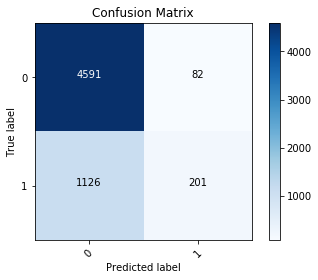

In [48]:
plot_confusion_matrix1(cnf_matrix , title="LogReg Confusion Matrix") 

# Update of Confusion Matrix

In [54]:
def plot_confusion_matrix2(cnf_matrix ,normalize=False,
                          title='Confusion matrix',
                          class_names = ['Non Default' , 'Default'], 
                          cmap=plt.cm.Blues):
    # Pseudocode/Outline:
    # Print the confusion matrix (optional)
    # Create the basic matrix
    # Add title and axis labels
    # Add appropriate axis scales
    # Add labels to each cell
    # Add a legend
    
#   print(cnf_matrix)

    plt.imshow(cnf_matrix, cmap=cmap)
    
    """Add title and axis labels""" 
    plt.title('Confusion Matrix') 
    plt.ylabel('True label') 
    plt.xlabel('Predicted label')
    
    """Add appropriate axis scales"""
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    
    """Text formatting"""
    fmt = '.2f' if normalize else 'd'
    """Add labels to each cell"""
    thresh = cnf_matrix.max() / 2.
    """Here we iterate through the confusion matrix and append labels to our visualization""" 
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cnf_matrix[i, j] > thresh else 'black')
    
    """Add a legend"""
    plt.colorbar()
    plt.show() 

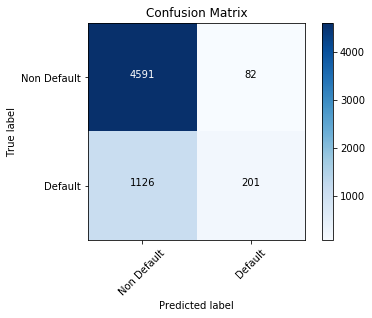

In [52]:
plot_confusion_matrix2(cnf_matrix)

# <a id="7">Explain Results of Confusion Matrix For Logistic Regression Model with Default Parameters:</a>

- It is used to describe the performance of a classification model on a set of test data for which the true values are known.
- It helps understand Type 1(FP) and Type II errors (FN)

In [31]:
conf_mat(actual, predicted)

{'TP': 201, 'TN': 4591, 'FP': 82, 'FN': 1126}

In [ ]:
TP : 201 cases were actual default and they were classified right.

TN : 4591 cases were people who payers and were classified as defaulters.

FP : 82 cases were wrongly classified as defualters but were classified as payers.

FN : 1126 cases were people who defaulted and were classified as payers.

# <a id="7">ROC CURVE For Logistic Regression</a>

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=.2,random_state=42)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=.2,random_state=42)


In [55]:
roc_auc_score(actual , predicted)

0.5669609330388251

In [56]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
skf = StratifiedKFold(n_splits=5,random_state=42)

In [59]:
from sklearn.metrics import roc_auc_score
def scores(model,X_train,X_val,y_train,y_val):
    train_prob = model.predict_proba(X_train)[:,1]
    val_prob = model.predict_proba(X_val)[:,1]
    train = roc_auc_score(y_train,train_prob)
    val = roc_auc_score(y_val,val_prob)
    print('train:',round(train,2),'test:',round(val,2))

In [58]:
def annot(fpr,tpr,thr):
    k=0
    for i,j in zip(fpr,tpr):
        if k %50 == 0:
            plt.annotate(round(thr[k],2),xy=(i,j), textcoords='data')
        k+=1

In [63]:
from sklearn.metrics import roc_curve
def roc_plot(model,X_train,y_train,X_val,y_val):
    train_prob = model.predict_proba(X_train)[:,1]
    val_prob = model.predict_proba(X_val)[:,1]
    plt.figure(figsize=(7,7))
    for data in [[y_train, train_prob],[y_val, val_prob]]: # ,[y_test, test_prob]
        fpr, tpr, threshold = roc_curve(data[0], data[1])
        plt.plot(fpr, tpr)
    annot(fpr, tpr, threshold)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.ylabel('TPR (power / Sensitivity)' , fontsize = 14)
    plt.xlabel('FPR (alpha / Recall)' , fontsize = 14)
    plt.legend(['train','val'])
    plt.show()

In [61]:
def opt_plots(opt_model):
    opt = pd.DataFrame(opt_model.cv_results_)
    cols = [col for col in opt.columns if ('mean' in col or 'std' in col) and 'time' not in col]
    params = pd.DataFrame(list(opt.params))
    opt = pd.concat([params,opt[cols]],axis=1,sort=False)
    
    plt.figure(figsize=[15,4])
    plt.subplot(121)
    sns.heatmap(pd.pivot_table(opt,index='max_depth',columns='min_samples_leaf',values='mean_train_score')*100)
    plt.title('ROC_AUC - Training')
    plt.subplot(122)
    sns.heatmap(pd.pivot_table(opt,index='max_depth',columns='min_samples_leaf',values='mean_test_score')*100)
    plt.title('ROC_AUC - Validation')
#     return opt

train: 0.7 test: 0.68


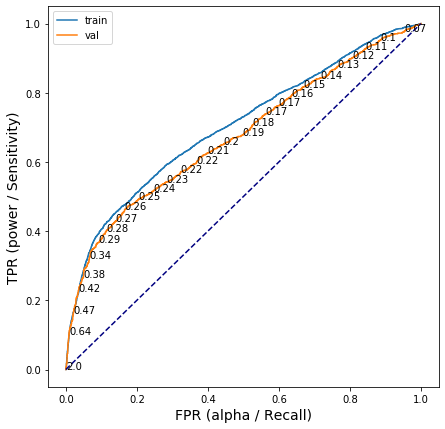

In [64]:
scores(logReg , X_train , X_val , y_train , y_val)
roc_plot(logReg , X_train , y_train , X_val , y_val)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
# import estimator model
from sklearn.naive_bayes import GaussianNB

# <a id="7">Decision Tree Classifier :</a>

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
# create an instance of the estimator
class_tree = DecisionTreeClassifier(min_samples_split = 30 , min_samples_leaf = 10 , random_state = 10)

class_tree.fit(X_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=30,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [89]:
y_pred_test = class_tree.predict(X_test)
metrics.loc['accuracy','DecisionTree'] = accuracy_score(y_pred = y_pred_test ,y_true = y_test)
metrics.loc['precision','DecisionTree'] = precision_score(y_pred = y_pred_test , y_true = y_test)
metrics.loc['recall','DecisionTree'] = recall_score(y_pred = y_pred_test , y_true = y_test)

CM = confusion_matrix(y_pred = y_pred_test , y_true = y_test)
C_Matrix(CM)

Precision,pay,default,Total
True,,,
pay,4213,460,4673
default,921,406,1327
Total,5134,866,6000


In [67]:
predicted = class_tree.predict(X_test)
actual = y_test

In [68]:
run_model2(class_tree , X_train ,y_train , X_test , y_test )

Confusion Matrix:
 [[4213  460]
 [ 921  406]]
Model Scores
------------------------
Training Accuracy: 73.03%
Test Accuracy:     60.38%
------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      4673
           1       0.47      0.31      0.37      1327

   micro avg       0.77      0.77      0.77      6000
   macro avg       0.64      0.60      0.61      6000
weighted avg       0.74      0.77      0.75      6000

-----------------------------------------------------
Confusion Matrix:
 [[4213  460]
 [ 921  406]]


In [70]:
cnf_matrix = confusion_matrix(actual , predicted)
print("Confusion Matrix:\n" , cnf_matrix)

Confusion Matrix:
 [[4213  460]
 [ 921  406]]


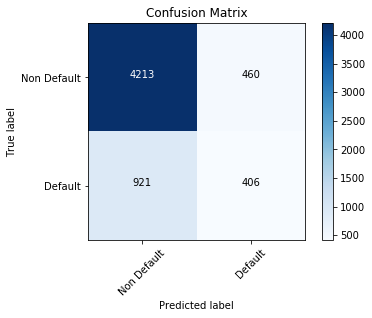

In [71]:
plot_confusion_matrix2(cnf_matrix)

# <a id="7">Explain Results of Confusion Matrix For Decision Tree Model:</a>


In [72]:
conf_mat(actual , predicted)

{'TP': 406, 'TN': 4213, 'FP': 460, 'FN': 921}

TP : 406 cases were actual default and they were classified right.

TN : 4213 cases were people who payers and were classified as defaulters.

FP : 460 cases were wrongly classified as defaulters but were classified as payers.

FN : 912 cases were people who defaulted and were classified as payers.

# ROC Curve For Decision Tree

train: 0.91 test: 0.65


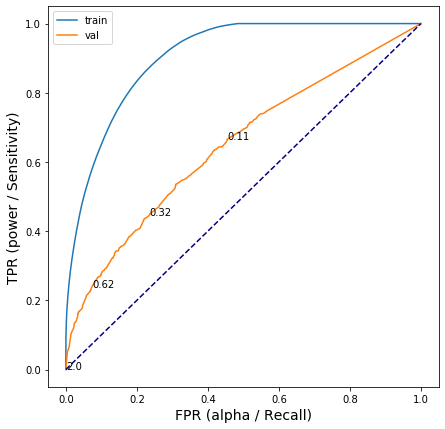

In [88]:
scores(class_tree , X_train , X_val , y_train , y_val)
roc_plot(class_tree , X_train , y_train , X_val , y_val)

In [76]:
# AUC Score
print("Area Under The Curve Score (AUC):" , roc_auc_score(actual, predicted))

Area Under The Curve Score (AUC): 0.6037577218515963


In [77]:
# Feature Importance Decision Tree
def plot_features(model , figsize):
    feat_importance = pd.Series(model.feature_importances_ , index = features.columns)
    ax.set_ylabel("features" , size = 16);
    feat_importance.nlargest(10).sort_values().plot(kind = "barh" , figsize = (10 , 5))
    plt.xlabel("Relative Feature Importance For Random Forest");
    plt.title("Feature Importance In Order" , size = 16);

    
# plot_features(class_tree , (8,8))  
# plot_features(rf_model , (8,8))

# <a id="7">NaiveBayesClassifier:</a>

In [ ]:
# import estimator model
from sklearn.naive_bayes import GaussianNB

In [79]:
#create an instance for the model
NBClassifier = GaussianNB()

In [80]:
NBClassifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [87]:
y_pred_test = NBClassifier.predict(X_test)
metrics.loc['accuracy','Naive Bayes'] = accuracy_score(y_pred = y_pred_test ,y_true = y_test)
metrics.loc['precision','Naive Bayes'] = precision_score(y_pred = y_pred_test , y_true = y_test)
metrics.loc['recall','Naive Bayes'] = recall_score(y_pred = y_pred_test , y_true = y_test)

CM = confusion_matrix(y_pred = y_pred_test , y_true = y_test)
C_Matrix(CM)

Precision,pay,default,Total
True,,,
pay,3924,749,4673
default,684,643,1327
Total,4608,1392,6000


In [81]:
predicted = NBClassifier.predict(X_test)
actual = y_test

In [82]:
cnf_matrix = confusion_matrix(actual , predicted)
print("Confusion Matrix:\n" , cnf_matrix)

Confusion Matrix:
 [[3924  749]
 [ 684  643]]


In [83]:
run_model2(NBClassifier , X_train , y_train , X_test , y_test)

Confusion Matrix:
 [[3924  749]
 [ 684  643]]
Model Scores
------------------------
Training Accuracy: 67.13%
Test Accuracy:     66.21%
------------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      4673
           1       0.46      0.48      0.47      1327

   micro avg       0.76      0.76      0.76      6000
   macro avg       0.66      0.66      0.66      6000
weighted avg       0.77      0.76      0.76      6000

-----------------------------------------------------
Confusion Matrix:
 [[3924  749]
 [ 684  643]]


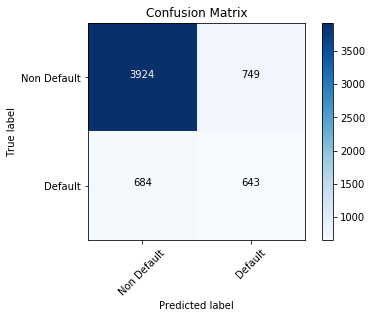

In [85]:
plot_confusion_matrix2(cnf_matrix)

In [86]:
conf_mat(actual , predicted)

{'TP': 643, 'TN': 3924, 'FP': 749, 'FN': 684}

# <a id="7">Explain Results of Confusion Matrix For Decision Tree Model:</a>


In [ ]:
TP : 643 cases were actual default and they were classified right.

TN : 3924 cases were people who payers and were classified as defaulters.

FP : 749 cases were wrongly classified as defaulters but were classified as payers.

FN : 684 cases were people who defaulted and were classified as payers.

train: 0.72 test: 0.69


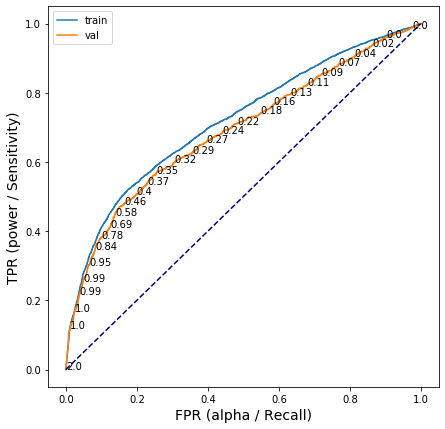

In [90]:
scores(NBClassifier , X_train , X_val , y_train , y_val)
roc_plot(NBClassifier , X_train , y_train , X_val , y_val)

In [91]:
# AUC score
print("Area Under The Curve Score (AUC):" , roc_auc_score(actual, predicted))

Area Under The Curve Score (AUC): 0.662134573205177



# <a id="7">Check the metrics Perfomance of the Models:</a>


In [124]:
100*metrics

,Baseline,NullModel,LogisticReg,DecisionTree,NaiveBayes
accuracy,78.9833,77.8833,79.8667,76.9833,76.1167
precision,55.8304,0,71.0247,46.8822,46.1925
recall,23.8131,0,15.1469,30.5953,48.4552


# <a id="7">Plotting the Metrics Perfomance of the Models:</a>


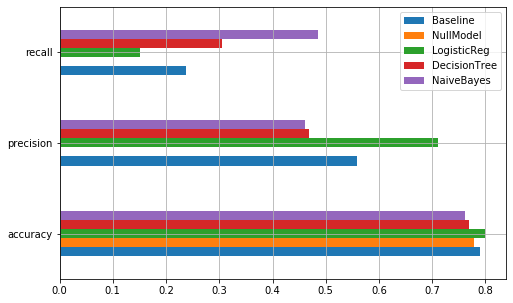

In [125]:
fig, ax=plt.subplots(figsize=(8,5))
metrics.plot(kind='barh', ax=ax)
ax.grid()